In [1]:
# General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baseline Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Random Forest Imports
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Imports
from sklearn.tree import DecisionTreeRegressor

# K-fold Validation Imports
from sklearn.model_selection import KFold, cross_val_score

In [2]:
data = pd.read_csv("crimedata2.csv", encoding="ISO-8859-1")
data = data.replace('?', np.nan)
data = data.dropna(subset=['ViolentCrimesPerPop'])


columns = ['agePct12t29', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'population', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'medIncome', 'medFamInc', 'perCapInc', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'ViolentCrimesPerPop']
df = data[columns].astype(float)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.describe()

,agePct12t29,PctLess9thGrade,PctNotHSGrad,PctBSorMore,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,medIncome,medFamInc,perCapInc,PctSpeakEnglOnly,PctNotSpeakEnglWell,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,27.617357,9.444203,22.700687,22.991550,5.225143e+04,9.509694,83.489218,2.750787,8.481610,33699.327482,39552.840020,15521.723170,86.553069,2.538460,589.078922
std,6.148044,6.843854,11.061712,12.514273,2.021475e+05,14.101979,16.393607,4.648200,15.208788,13391.741380,14202.644655,6227.115252,14.583075,4.384017,614.784518
min,9.380000,0.200000,2.090000,1.630000,1.000500e+04,0.000000,2.680000,0.030000,0.120000,11576.000000,13785.000000,5237.000000,6.150000,0.000000,0.000000
25%,24.380000,4.770000,14.195000,14.090000,1.435925e+04,0.940000,75.882500,0.612500,0.920000,23597.000000,29307.250000,11548.250000,83.697500,0.510000,161.700000
50%,26.765000,7.920000,21.655000,19.625000,2.268100e+04,3.150000,89.605000,1.240000,2.340000,30896.000000,36009.500000,13977.000000,91.780000,0.955000,374.060000
75%,29.180000,12.245000,29.665000,28.935000,4.315375e+04,11.965000,95.987500,2.737500,8.610000,41214.750000,46682.750000,17774.500000,95.407500,2.467500,794.400000
max,70.510000,49.890000,73.660000,73.630000,7.322564e+06,96.670000,99.630000,57.460000,95.290000,123625.000000,131315.000000,63302.000000,98.980000,38.330000,4877.060000


## Baseline

Average ViolentCrimesPerPop: 589.078921765296
Mean Squared Error: 348041.6146645915
Root Mean Squared Error: 589.9505188272924
R-Squared Score: -7.000089035669177e-05


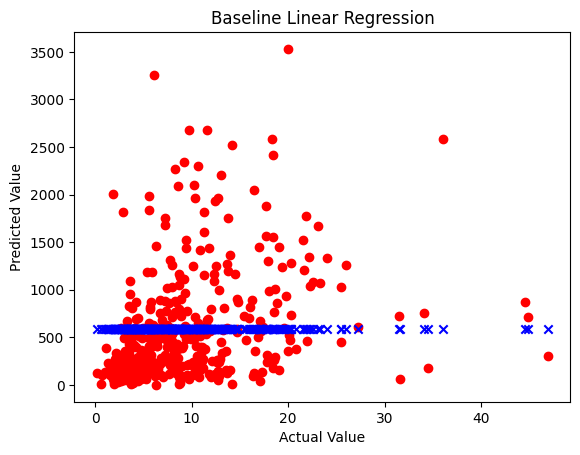

In [3]:
# Calculate Average ViolentCrimesPerPop for baseline
avgViolent = df['ViolentCrimesPerPop'].mean()
print('Average ViolentCrimesPerPop:', avgViolent)

# Add average to the dataset
df['AvgViolentCrimesPerPop'] = avgViolent

# Seperate Predictive and Target
X = df.drop(columns=['ViolentCrimesPerPop', 'AvgViolentCrimesPerPop'])
y = df['ViolentCrimesPerPop']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
baseline = LinearRegression().fit(X_train, y_train)
y_pred = df['AvgViolentCrimesPerPop'][:399] # Not optimal way to do this, but it works (was getting error without specific, CORRECT series length)

# Print Details
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print graph
# IMPORTANT: X-axis has wrong scale (gonna need to fix, but not currently sure how)
plt.scatter(X_test.iloc[:,1], y_test, color='red')
plt.scatter(X_test.iloc[:,1], y_pred, color='blue', marker='x')
plt.title('Baseline Linear Regression')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Remove Average column from dataset to not impact future models
df = df.drop(columns=['AvgViolentCrimesPerPop'])

### Random Forest

Mean Squared Error: 142528.10608504928
Root Mean Squared Error: 377.52894734715284
R-Squared Score: 0.5904567811043505


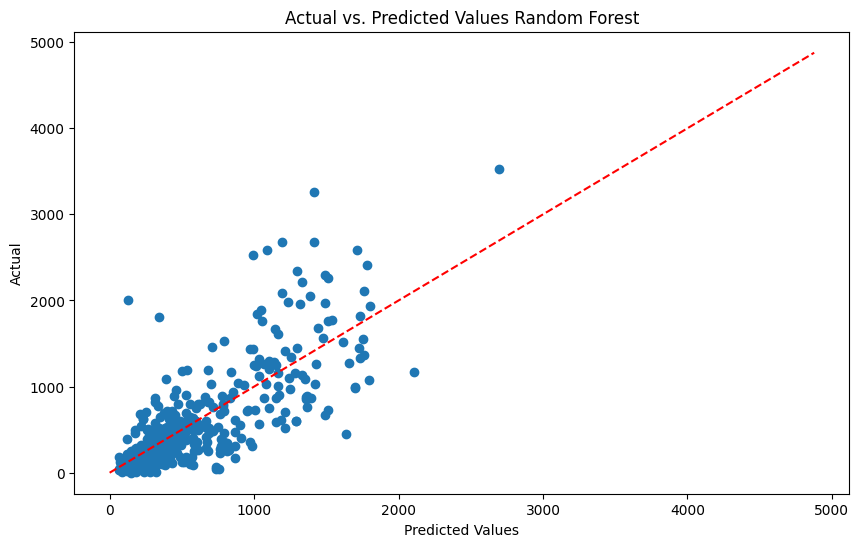

In [4]:
# Random Forest Model
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

In [5]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.57066658 0.66319633 0.55744091 0.57827035 0.46960047 0.62262705
 0.62905473 0.63373064 0.51596266 0.52278203]
Average CV Score:  0.5763331768399823
Number of CV Scores used in Average:  10


### Decision Tree

Mean Squared Error: 313014.7013837093
Root Mean Squared Error: 559.4771678841857
R-Squared Score: 0.10057705888655011


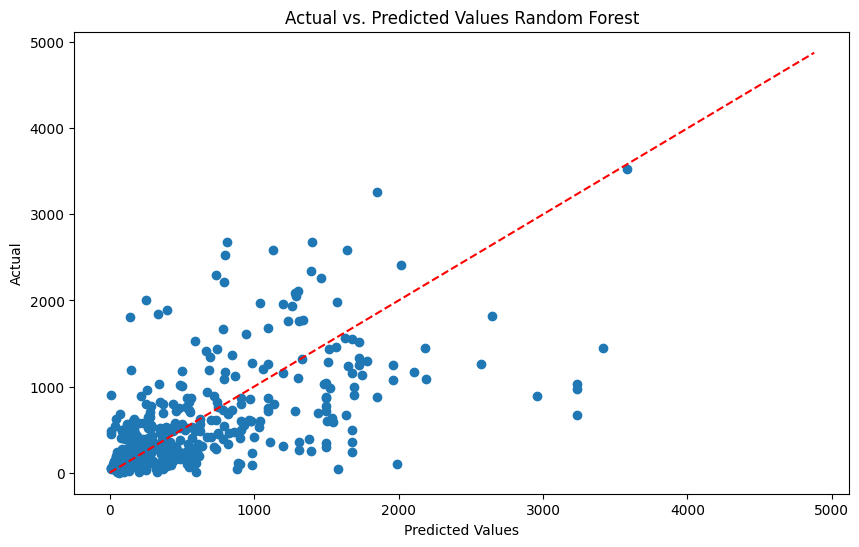

In [6]:
# Decision Tree Model
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

In [7]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.58932153 0.65925999 0.54336074 0.5871197  0.48450144 0.5937906
 0.62356075 0.64349454 0.52024879 0.48712237]
Average CV Score:  0.5731780451963802
Number of CV Scores used in Average:  10


### Linear Regression

Mean Squared Error: 159147.62381555256
Root Mean Squared Error: 398.9331069434481
R-Squared Score: 0.5427019138378051


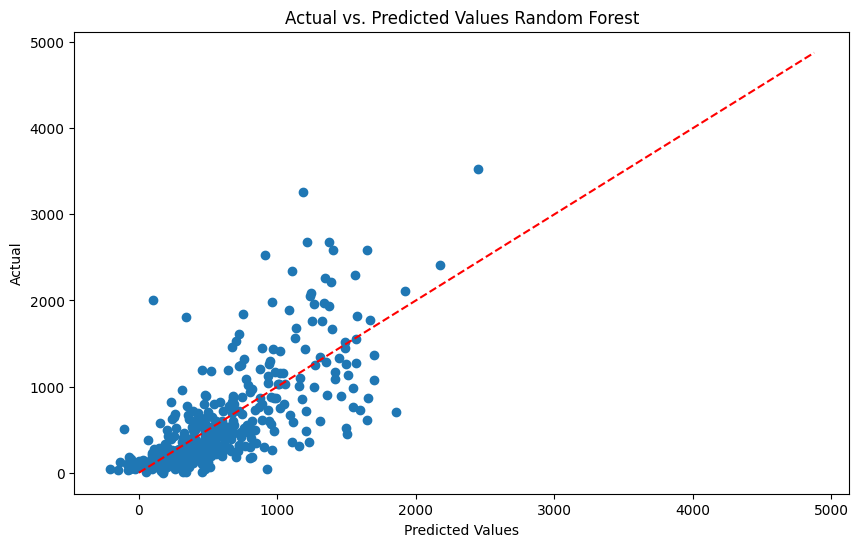

Coefficients: [ 3.42961857e-01 -5.49565014e+01  3.66068386e+01  5.27380507e+00
  2.15152278e-04  1.62727272e+01 -5.46230858e+00  5.35090049e+00
  7.06626188e+00  1.97388490e-03 -2.31407057e-02  3.40772334e-02
  4.61697467e+00  3.28007864e+01]
Intercept: 198.399882210918


In [8]:
# Linear Regression Model
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Accuracy Metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-Squared Score:', r2_score(y_test,y_pred))

# Print Graph
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs. Predicted Values Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual')
plt.show()

# Print Calculation Details
# Would like to include variable name with Coefficients
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

In [9]:
# Cross Validation with K-folds
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.58113631 0.66785846 0.57183018 0.5904529  0.49414764 0.61151981
 0.62176847 0.6495872  0.50551744 0.49026072]
Average CV Score:  0.5784079124629171
Number of CV Scores used in Average:  10


## Classification

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

catData = df
bins = [0, 161.7, 794.4, 4877.06]
catData['ViolentCrimesCat'] = pd.cut(catData['ViolentCrimesPerPop'], bins=bins, labels=['low', 'medium', 'high'])
catData['ViolentCrimesCat'].value_counts()

X = catData.drop(columns=['ViolentCrimesPerPop', 'ViolentCrimesCat'])
y = catData['ViolentCrimesCat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1595, 14), (399, 14), (1595,), (399,))

## DT

In [11]:
# deciesion tree regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
dt_cart = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_cart.predict(X_test)

### Cross Validation

In [12]:
k = 5
cv_scores = cross_val_score(dt_cart, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.90225564 0.90977444 0.89223058 0.89974937 0.88693467]
Average Cross-Validation Score: 0.8981889396858982


### Metrics

In [13]:
# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt_cart.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.8947368421052632
Precision: 0.8945446833540138
Recall: 0.8947368421052632
F1-Score: 0.8945519923631421
ROC-AUC: 0.5602081974772675


## RF

In [14]:
# random forest regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Train the model and fit to test data
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Cross Validation

In [15]:
k = 10
cv_scores = cross_val_score(rf, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.94       0.94       0.945      0.93       0.93969849 0.93969849
 0.93969849 0.93969849 0.93467337 0.93467337]
Average Cross-Validation Score: 0.9383140703517586


### Metrics

In [16]:
# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.9398496240601504
Precision: 0.9317983253298642
Recall: 0.9398496240601504
F1-Score: 0.9211212228572382
ROC-AUC: 0.7109765962016615


C:\Users\fantu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

### Cross Validation

In [18]:
k = 10
cv_scores = cross_val_score(nb_classifier, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.815      0.905      0.865      0.85       0.90452261 0.83417085
 0.88442211 0.87437186 0.84924623 0.82914573]
Average Cross-Validation Score: 0.8610879396984924


### Metrics

In [19]:
# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.8521303258145363
Precision: 0.9193121693121693
Recall: 0.8521303258145363
F1-Score: 0.8806888900207789
ROC-AUC: 0.8551294563670663


## Gradient Boost

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

### Cross Validation

In [21]:
k = 5
cv_scores = cross_val_score(gb_classifier, X, y, cv=k, scoring='accuracy')
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")

Cross-Validation Scores for each fold: [0.93483709 0.9273183  0.93483709 0.92982456 0.92211055]
Average Cross-Validation Score: 0.9297855190740669


### Metrics

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.8521303258145363
Precision: 0.9193121693121693
Recall: 0.8521303258145363
F1-Score: 0.8806888900207789
ROC-AUC: 0.8551294563670663


### NOTES

- With the classification models, I binned the violent crimes column into small medium and large. Im not sure that the binning is accurate enough for the dataset and we should look to more specificaly tune bin sizes.
- I think that overall the classification models are more accurate than the regression models but that could be due to the bins. 
- Looking at the classification models Random forest performed the best with the best performance in crossvalidation and in general accuracy scores.
- the next best model seemed to be gradient boost, it performed about as well as random forest in cross validation but had slightly lower accuracy and other metrics
- Decisicion tress was the opposite with lower cross validation scores but better accuracy and precision metrics
